In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import pandas to read the csv file
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib

In [ ]:
#reading the y.txt file which contains labels
y = pd.read_csv('y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
y

,Complexity,Node Number,Language
0,O(1),nodes0,C
1,O(2n),nodes0,C
2,O(2n),nodes1,C
3,O(logN),nodes0,C
4,O(logN),nodes1,C
...,...,...,...
735,O(NlogN),nodes5,Java
736,O(NlogN),nodes6,Java
737,O(NlogN),nodes7,Java
738,O(NlogN),nodes8,Java


In [ ]:
x = np.load('x.npy')

In [ ]:
x

array([[-0.05468176,  0.127175  ,  0.0366478 , ...,  0.09731236,
        -0.107657  ,  0.08184043],
       [-0.0952346 ,  0.17503381,  0.06393544, ...,  0.1181241 ,
        -0.12556435,  0.13071893],
       [-0.13581266,  0.21943617,  0.10214286, ...,  0.1283566 ,
        -0.14471857,  0.19222681],
       ...,
       [ 0.18476942, -0.20165125, -0.23536444, ...,  0.23089787,
        -0.3212845 , -0.2662279 ],
       [ 0.25568134, -0.19382419, -0.3828221 , ...,  0.27317905,
        -0.33641592, -0.30042982],
       [ 0.78257215, -0.16311097, -0.7386889 , ...,  0.5125705 ,
        -0.17265631, -0.5655121 ]], dtype=float32)

In [ ]:
df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb119,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.125052,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.191601,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,-0.259607,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.392645,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.449514,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.329598,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.263365,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.239681,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.323401,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430


In [ ]:
df_y = pd.read_csv('y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
df['Complexity'] = df_y['Complexity']
df['Language']=df_y['Language']

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Complexity,Language
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840,O(1),C
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719,O(2n),C
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227,O(2n),C
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,O(logN),C
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,O(logN),C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,O(NlogN),Java
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,O(NlogN),Java
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,O(NlogN),Java
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,O(NlogN),Java


In [ ]:
df_r = df.groupby('Complexity').agg('count')

In [ ]:
df_r

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
Complexity,,,,,,,,,,,,,,,,,,,,,
O(1),6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
O(2n),7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
O(N!),4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
O(N),375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
O(N2),165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
O(N3),27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
O(Nd),22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
O(NlogN),100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
O(logN),31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [ ]:
df_recovered = df_r.sort_values(by='Language', ascending=False)

In [ ]:
df_recovered

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
Complexity,,,,,,,,,,,,,,,,,,,,,
O(N),375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
O(N2),165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
O(NlogN),100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
O(logN),31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
O(N3),27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
O(Nd),22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
O(2n),7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
O(1),6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
O(N!),4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


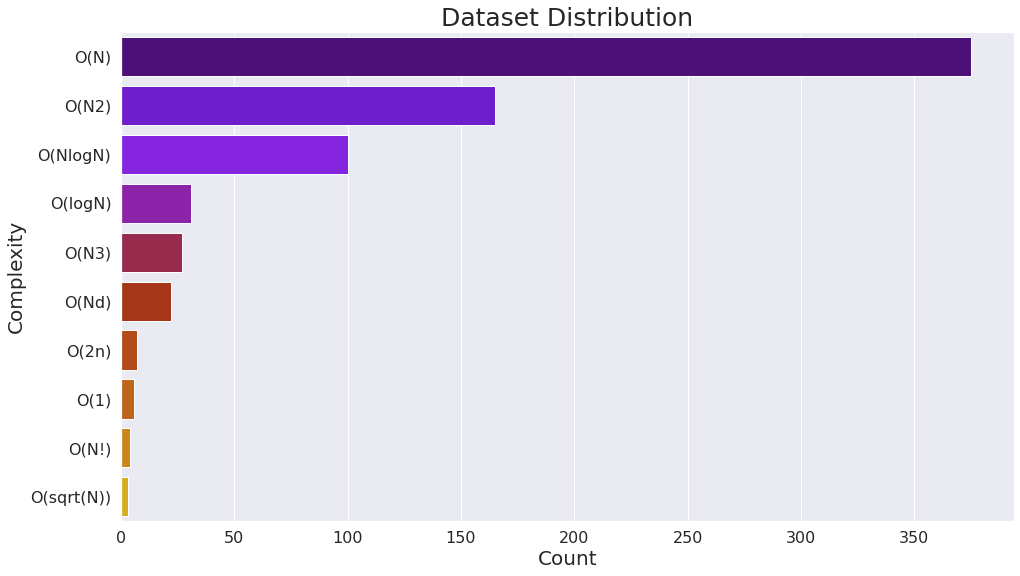

In [ ]:
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Set dark grid
sns.set()

# Convert index of countries to series for plotting
y_vals = df_recovered.index.to_series()

# Select 'Confirmed' column as y-values
x_vals = df_recovered['Language']

# Set size of figure
fig,ax=plt.subplots(figsize=(16,9))

# Create horizontal bar plot
sns.barplot(x=x_vals, y=y_vals, palette='gnuplot')

# Title plot
plt.title('Dataset Distribution', size=25)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)
plt.xlabel('Count',size=20)
plt.ylabel('Complexity',size=20)
plt.savefig('Dataset Distribution', dpi=300)


# Show plot
plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm.

In [ ]:
df.reset_index()

,index,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Complexity,Language
0,0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,...,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840,O(1),C
1,1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,...,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719,O(2n),C
2,2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,...,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227,O(2n),C
3,3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,O(logN),C
4,4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,O(logN),C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,...,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,O(NlogN),Java
736,736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,...,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,O(NlogN),Java
737,737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,...,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,O(NlogN),Java
738,738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,...,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,O(NlogN),Java


In [ ]:
ind=df.set_index('Complexity')
df = ind.drop(["O(1)", "O(2n)", "O(N!)","O(sqrt(N))"])

In [ ]:
df=df.reset_index()

In [ ]:
df

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
0,O(logN),0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,C
1,O(logN),0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,C
2,O(logN),0.099151,0.171953,-0.230760,0.147983,0.240728,0.211076,-0.085177,-0.008800,-0.065532,...,-0.348318,-0.186028,-0.086344,-0.106616,-0.450628,0.463381,0.325981,-0.107556,0.129127,C
3,O(logN),0.004622,0.254111,0.043829,0.140978,0.663985,0.359904,-0.219945,0.108162,-0.140120,...,-0.262810,-0.185516,-0.029431,-0.201144,-0.293320,0.295109,0.290326,-0.353395,0.164944,C
4,O(logN),-0.013093,0.067878,-0.087897,0.155157,0.046141,0.043758,-0.005407,-0.022934,0.036307,...,-0.180832,-0.147306,-0.039465,-0.092333,-0.350462,0.329363,0.250614,-0.131446,0.113169,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,O(NlogN),0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,...,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,Java
716,O(NlogN),0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,...,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,Java
717,O(NlogN),0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,...,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,Java
718,O(NlogN),0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,...,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,Java


In [ ]:
df['Language'].value_counts()

Java      307
Python    299
C         114
Name: Language, dtype: int64

In [ ]:
for i in df.index:
    if df['Language'][i]=='C':
        df['Language'][i]=1
    elif df['Language'][i]=='Python':
        df['Language'][i]=2
    else:
        df['Language'][i]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df["Language"]

0      1
1      1
2      1
3      1
4      1
      ..
715    3
716    3
717    3
718    3
719    3
Name: Language, Length: 720, dtype: object

In [ ]:
df[df['Language']==1]['Complexity'].value_counts()

O(N)        61
O(N2)       26
O(NlogN)    11
O(logN)      7
O(N3)        6
O(Nd)        3
Name: Complexity, dtype: int64

df[df['Language']==2]['Complexity'].value_counts()

In [ ]:
df[df['Language']==3]['Complexity'].value_counts()

O(N)        165
O(N2)        65
O(NlogN)     47
O(N3)        11
O(logN)      10
O(Nd)         9
Name: Complexity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


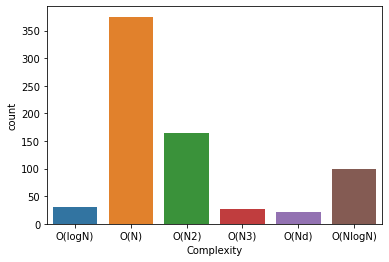

In [ ]:
import seaborn as sns
sns.countplot(df['Complexity'])

In [ ]:
df[(df['Complexity'] == 'O(N)') & (df['Language']==1)]

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
7,O(N),-0.243289,0.228256,-0.014906,0.183744,0.403965,0.112312,-0.163134,-0.020876,0.040523,...,-0.103126,-0.334219,-0.063999,-0.118122,-0.627872,0.481634,0.227127,-0.260474,0.352740,1
8,O(N),-0.196394,0.205731,0.205676,0.142592,0.506832,0.126028,-0.088501,0.058801,-0.107793,...,-0.182082,-0.163133,0.000748,-0.201163,-0.351895,0.470538,0.235327,-0.241143,0.226568,1
9,O(N),-0.172491,0.155677,0.157534,0.095757,0.361451,0.031941,-0.096687,-0.033858,-0.091294,...,-0.146031,-0.264142,-0.061587,-0.064415,-0.450642,0.522145,0.244842,-0.255486,0.212966,1
10,O(N),-0.110855,0.166821,0.102777,0.097845,0.316420,0.043284,-0.060178,-0.062428,-0.028781,...,-0.113984,-0.185946,-0.009870,-0.028287,-0.289062,0.299567,0.130509,-0.142615,0.126911,1
11,O(N),-0.229012,0.182189,0.004268,0.146265,0.364267,0.069474,-0.147818,-0.027979,0.021022,...,-0.092414,-0.305835,-0.039736,-0.074877,-0.593687,0.470647,0.218723,-0.255736,0.293899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,O(N),-0.265451,0.183423,0.084866,0.128623,0.426529,0.029188,-0.085466,0.024569,0.004055,...,-0.010183,-0.191687,-0.040436,-0.010625,-0.454994,0.414790,0.183136,-0.253096,0.171093,1
64,O(N),-0.231968,0.215625,0.151250,0.119024,0.405650,0.061893,-0.130033,0.006475,-0.006747,...,-0.014826,-0.324586,-0.039029,-0.078202,-0.492834,0.492971,0.191719,-0.226517,0.270333,1
65,O(N),-0.162154,0.679196,-0.058401,0.486362,0.137956,0.228954,-0.121588,0.036697,0.643843,...,0.645507,-0.521633,0.091165,0.096455,-0.426825,-0.009120,-0.057033,-0.110752,0.246181,1
66,O(N),-0.216972,0.242222,0.144557,0.096483,0.346420,0.088165,-0.054953,0.006949,-0.009416,...,-0.016349,-0.267432,-0.030925,-0.067879,-0.388048,0.435569,0.149285,-0.198840,0.269014,1


In [ ]:
df_c=df[df['Language']==1]
df_python=df[df['Language']==2]
df_java=df[df['Language']==3]

In [ ]:
df_java=df_java.reset_index()
df_c=df_c.reset_index()
df_python=df_python.reset_index()

In [ ]:
df_java.shape, df_c.shape, df_python.shape

((307, 131), (114, 131), (299, 131))

In [ ]:
from sklearn.utils import resample
def resample_data(df,temp):
    df_majority = df[(df['Complexity'] == 'O(N)')]
    df_minority_1 = df[(df['Complexity'] == 'O(N2)')]
    df_minority_2 = df[(df['Complexity'] == 'O(NlogN)')]
    df_minority_3 = df[(df['Complexity'] == 'O(logN)')]
    df_minority_4 = df[(df['Complexity'] == 'O(N3)')]
    df_minority_5 = df[(df['Complexity'] == 'O(Nd)')]
    minority = [df_minority_1, df_minority_2, df_minority_3, df_minority_4, df_minority_5]
    for i in minority:
        df_minority_upsampled = resample(i,replace=True,n_samples= len(df_majority),random_state=42)  
        temp.append(df_minority_upsampled)
    df_upsampled = df_majority
    for k in temp:
        df_upsampled = pd.concat([k, df_upsampled])
    return df_upsampled

In [ ]:
t1=[]
t2=[]
t3=[]
df1=resample_data(df_c,t1)
df2=resample_data(df_python,t2)
df3=resample_data(df_java,t3)

In [ ]:
df3

,index,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
257,670,O(Nd),0.124783,0.035802,-0.291526,0.395851,0.381023,0.240169,-0.421427,-0.305636,...,-0.164347,0.012109,0.035059,-0.299402,-0.210486,0.017036,0.265174,-0.374437,-0.213837,3
254,667,O(Nd),0.584053,-0.420352,-0.138906,0.882100,0.572474,-0.369330,-1.025875,-0.379530,...,-0.481197,0.119848,-0.046521,-0.050263,-1.063390,0.190388,0.475502,-0.634684,-0.459968,3
258,671,O(Nd),0.231795,-0.131289,-0.292999,0.554901,0.639297,-0.033528,-0.476811,-0.182997,...,-0.409527,0.033311,0.231508,-0.132279,-0.642944,0.033778,0.220982,-0.282507,-0.261264,3
255,668,O(Nd),0.157644,-0.045185,-0.216272,0.534384,0.500328,-0.039950,-0.508855,-0.155340,...,-0.231045,-0.076423,0.180114,-0.094190,-0.596587,-0.035084,0.146248,-0.353939,-0.247827,3
257,670,O(Nd),0.124783,0.035802,-0.291526,0.395851,0.381023,0.240169,-0.421427,-0.305636,...,-0.164347,0.012109,0.035059,-0.299402,-0.210486,0.017036,0.265174,-0.374437,-0.213837,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,583,O(N),0.579231,-0.456087,-0.135015,0.540045,0.609881,-0.114857,-0.520599,-0.321594,...,-0.713122,0.174620,0.021816,-0.261586,-0.590854,-0.030575,0.517843,-0.212081,-0.666207,3
171,584,O(N),0.257447,-0.192605,-0.443822,0.751283,0.421603,0.143394,-0.627634,-0.095693,...,-0.113071,-0.325937,0.233039,-0.357373,-0.587259,-0.277362,0.218456,-0.585042,-0.227599,3
172,585,O(N),0.198406,-0.007672,-0.215018,0.597814,0.729766,0.182500,-0.632002,-0.119848,...,-0.299855,-0.066480,0.184069,-0.246278,-0.591603,-0.156452,0.235012,-0.503389,-0.245623,3
173,586,O(N),-0.002823,0.045196,-0.436771,0.401688,0.156893,0.111678,-0.307858,-0.454368,...,-0.221097,0.080485,0.001917,-0.160006,-0.211306,0.280990,0.274126,-0.174943,-0.095639,3


In [ ]:
df1['Complexity'].value_counts()

O(Nd)       61
O(N3)       61
O(logN)     61
O(NlogN)    61
O(N2)       61
O(N)        61
Name: Complexity, dtype: int64

In [ ]:
df2['Complexity'].value_counts()

O(Nd)       149
O(N3)       149
O(logN)     149
O(NlogN)    149
O(N2)       149
O(N)        149
Name: Complexity, dtype: int64

In [ ]:
df3['Complexity'].value_counts()

O(Nd)       165
O(N3)       165
O(logN)     165
O(NlogN)    165
O(N2)       165
O(N)        165
Name: Complexity, dtype: int64

In [ ]:
frames=[df1,df2,df3]
df_upsampled=pd.concat(frames)

In [ ]:
df_upsampled=df_upsampled.reset_index()

In [ ]:
df_upsampled=df_upsampled.drop(labels=["level_0","index"],axis=1)

In [ ]:
df_upsampled

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
0,O(Nd),-0.293674,0.304444,0.250773,0.141003,0.381330,0.122239,-0.115619,0.007201,0.053471,...,0.078113,-0.381301,0.007177,-0.078745,-0.429760,0.402106,0.142333,-0.235536,0.311468,1
1,O(Nd),-0.267195,0.212408,0.195217,0.065274,0.398566,0.069186,-0.056006,-0.035244,-0.082121,...,-0.107851,-0.280721,-0.041906,-0.079824,-0.451857,0.487933,0.193895,-0.201972,0.272100,1
2,O(Nd),-0.293674,0.304444,0.250773,0.141003,0.381330,0.122239,-0.115619,0.007201,0.053471,...,0.078113,-0.381301,0.007177,-0.078745,-0.429760,0.402106,0.142333,-0.235536,0.311468,1
3,O(Nd),-0.293674,0.304444,0.250773,0.141003,0.381330,0.122239,-0.115619,0.007201,0.053471,...,0.078113,-0.381301,0.007177,-0.078745,-0.429760,0.402106,0.142333,-0.235536,0.311468,1
4,O(Nd),-0.267195,0.212408,0.195217,0.065274,0.398566,0.069186,-0.056006,-0.035244,-0.082121,...,-0.107851,-0.280721,-0.041906,-0.079824,-0.451857,0.487933,0.193895,-0.201972,0.272100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,O(N),0.579231,-0.456087,-0.135015,0.540045,0.609881,-0.114857,-0.520599,-0.321594,-0.128897,...,-0.713122,0.174620,0.021816,-0.261586,-0.590854,-0.030575,0.517843,-0.212081,-0.666207,3
2246,O(N),0.257447,-0.192605,-0.443822,0.751283,0.421603,0.143394,-0.627634,-0.095693,0.116101,...,-0.113071,-0.325937,0.233039,-0.357373,-0.587259,-0.277362,0.218456,-0.585042,-0.227599,3
2247,O(N),0.198406,-0.007672,-0.215018,0.597814,0.729766,0.182500,-0.632002,-0.119848,0.046910,...,-0.299855,-0.066480,0.184069,-0.246278,-0.591603,-0.156452,0.235012,-0.503389,-0.245623,3
2248,O(N),-0.002823,0.045196,-0.436771,0.401688,0.156893,0.111678,-0.307858,-0.454368,-0.061445,...,-0.221097,0.080485,0.001917,-0.160006,-0.211306,0.280990,0.274126,-0.174943,-0.095639,3


In [ ]:
df_upsampled['Complexity'].value_counts()

O(Nd)       375
O(N3)       375
O(logN)     375
O(NlogN)    375
O(N2)       375
O(N)        375
Name: Complexity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


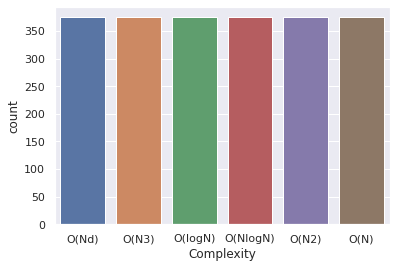

In [ ]:
sns.countplot(df_upsampled['Complexity'])

In [ ]:
df = df_upsampled
# df = oversampled
factor = pd.factorize(df['Complexity'])
df.Complexity= factor[0]
definitions = factor[1]
print(df.Complexity.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Complexity, dtype: int64
Index(['O(Nd)', 'O(N3)', 'O(logN)', 'O(NlogN)', 'O(N2)', 'O(N)'], dtype='object')


In [ ]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,1:130].values


In [ ]:
y = df['Complexity']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X

array([[-0.2936735451221466, 0.30444350838661194, 0.25077295303344727,
        ..., -0.23553623259067535, 0.3114684522151947, 1],
       [-0.2671947181224823, 0.21240846812725067, 0.19521677494049072,
        ..., -0.20197249948978424, 0.2721002399921417, 1],
       [-0.2936735451221466, 0.30444350838661194, 0.25077295303344727,
        ..., -0.23553623259067535, 0.3114684522151947, 1],
       ...,
       [0.19840596616268158, -0.007671911269426346, -0.21501845121383667,
        ..., -0.5033887624740601, -0.24562330543994904, 3],
       [-0.002823112066835165, 0.04519595205783844, -0.4367711544036865,
        ..., -0.17494328320026398, -0.09563864767551422, 3],
       [0.22317786514759064, -0.2451382279396057, -0.6723769903182983,
        ..., -0.45773106813430786, -0.3405236005783081, 3]], dtype=object)

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'max_depth': 13, 'max_features': 11}
0.948422090729783


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=10,max_features=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       n_estimators=10, random_state=42)

In [ ]:
num_classes = len(set(df_upsampled['Complexity']))
num_classes

6

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 84,   0,   0,   0,   0,   0],
       [  0,  89,   0,   0,   0,   0],
       [  0,   0,  90,   0,   0,   0],
       [  1,   1,   0,  76,   5,   5],
       [  0,   1,   0,   2, 104,   6],
       [  1,   0,   2,   5,  17,  74]])

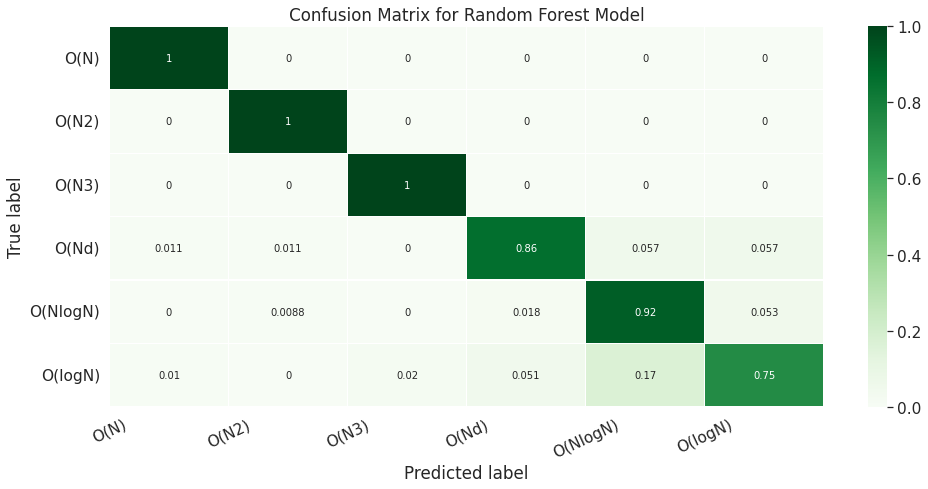

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9182948490230906

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       0.98      1.00      0.99        89
           2       0.98      1.00      0.99        90
           3       0.92      0.86      0.89        88
           4       0.83      0.92      0.87       113
           5       0.87      0.75      0.80        99

    accuracy                           0.92       563
   macro avg       0.92      0.92      0.92       563
weighted avg       0.92      0.92      0.92       563



In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# smote_obj = SMOTE()
# X_train, y_train = smote_obj.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(1687, 129)

In [ ]:
y_train.shape

(1687,)

In [ ]:
y_test

array([0, 2, 1, 3, 4, 5, 5, 0, 4, 3, 1, 3, 0, 0, 5, 1, 0, 3, 5, 2, 5, 5,
       5, 2, 4, 4, 2, 1, 3, 2, 4, 3, 3, 3, 1, 0, 3, 1, 5, 5, 5, 2, 3, 0,
       3, 5, 5, 4, 1, 4, 5, 3, 0, 4, 5, 3, 2, 1, 1, 5, 4, 4, 4, 0, 5, 5,
       2, 4, 2, 3, 1, 2, 3, 4, 4, 5, 4, 2, 5, 3, 0, 1, 1, 3, 3, 5, 1, 1,
       4, 3, 4, 2, 4, 4, 1, 3, 5, 0, 1, 5, 4, 2, 3, 3, 4, 0, 1, 5, 1, 1,
       4, 2, 3, 1, 0, 1, 0, 4, 0, 1, 5, 2, 4, 2, 5, 5, 4, 5, 1, 4, 1, 3,
       5, 1, 5, 1, 4, 3, 2, 3, 2, 2, 2, 4, 1, 4, 5, 3, 3, 0, 4, 4, 4, 3,
       0, 4, 4, 3, 4, 4, 0, 2, 1, 3, 0, 3, 0, 1, 3, 0, 2, 5, 0, 4, 4, 2,
       4, 1, 0, 5, 4, 1, 3, 2, 5, 0, 0, 0, 1, 3, 1, 0, 1, 3, 5, 4, 0, 0,
       5, 5, 1, 0, 3, 2, 4, 3, 2, 5, 1, 3, 4, 5, 2, 3, 0, 1, 5, 5, 1, 0,
       2, 3, 0, 4, 3, 1, 2, 1, 0, 0, 4, 5, 5, 0, 4, 0, 4, 2, 2, 4, 4, 0,
       2, 0, 0, 3, 0, 4, 2, 4, 5, 4, 4, 5, 0, 5, 3, 2, 1, 0, 1, 3, 0, 3,
       2, 3, 4, 5, 5, 2, 4, 0, 5, 0, 2, 1, 0, 3, 3, 2, 2, 4, 5, 3, 3, 5,
       2, 0, 5, 4, 0, 4, 2, 1, 5, 4, 4, 4, 3, 0, 2,

In [ ]:
y_pred

array([0, 2, 1, 3, 3, 5, 5, 0, 4, 3, 1, 3, 0, 0, 5, 1, 0, 3, 2, 2, 5, 4,
       4, 2, 5, 4, 2, 1, 4, 2, 1, 3, 3, 3, 1, 0, 3, 1, 5, 5, 5, 2, 3, 0,
       3, 5, 5, 4, 1, 4, 5, 3, 0, 4, 5, 4, 2, 1, 1, 5, 4, 4, 4, 0, 5, 4,
       2, 4, 2, 3, 1, 2, 3, 4, 4, 5, 4, 2, 5, 3, 0, 1, 1, 3, 3, 4, 1, 1,
       4, 1, 4, 2, 4, 4, 1, 5, 5, 0, 1, 3, 4, 2, 3, 3, 4, 0, 1, 2, 1, 1,
       4, 2, 3, 1, 0, 1, 0, 4, 0, 1, 5, 2, 4, 2, 5, 5, 4, 5, 1, 4, 1, 3,
       5, 1, 5, 1, 4, 3, 2, 5, 2, 2, 2, 4, 1, 4, 5, 3, 3, 0, 5, 4, 4, 3,
       0, 4, 4, 3, 4, 4, 0, 2, 1, 3, 0, 3, 0, 1, 3, 0, 2, 5, 0, 4, 4, 2,
       4, 1, 0, 5, 4, 1, 3, 2, 5, 0, 0, 0, 1, 3, 1, 0, 1, 3, 4, 5, 0, 0,
       5, 5, 1, 0, 3, 2, 4, 3, 2, 3, 1, 4, 4, 5, 2, 3, 0, 1, 5, 5, 1, 0,
       2, 3, 0, 4, 3, 1, 2, 1, 0, 0, 4, 5, 4, 0, 4, 0, 4, 2, 2, 4, 4, 0,
       2, 0, 0, 4, 0, 4, 2, 4, 5, 4, 4, 5, 0, 5, 3, 2, 1, 0, 1, 3, 0, 3,
       2, 3, 4, 5, 5, 2, 4, 0, 5, 0, 2, 1, 0, 5, 3, 2, 2, 4, 5, 3, 3, 5,
       2, 0, 5, 4, 0, 4, 2, 1, 4, 4, 4, 4, 3, 0, 2,

In [ ]:
accuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.83%


In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, predictions))
#print("Kappa score:" + cohen_kappa_score(y_test, y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       0.98      1.00      0.99        89
           2       0.98      1.00      0.99        90
           3       0.92      0.86      0.89        88
           4       0.83      0.92      0.87       113
           5       0.87      0.75      0.80        99

    accuracy                           0.92       563
   macro avg       0.92      0.92      0.92       563
weighted avg       0.92      0.92      0.92       563

0.9185973992001839
0.9182948490230906
0.9169264974549255
0.9016814155932409


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = classifier.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9869254771966713

# Adaboost

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

In [ ]:

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

In [ ]:
y_pred = bdt_real.predict(X_test) 
y_pred1 = bdt_discrete.predict(X_test) 

In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1,average='weighted'))
print(recall_score(y_test, y_pred1,average='weighted'))
print(f1_score(y_test, y_pred1,average='weighted'))
print(cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        84
           1       0.98      0.98      0.98        89
           2       0.97      1.00      0.98        90
           3       0.77      0.82      0.80        88
           4       0.78      0.81      0.79       113
           5       0.74      0.70      0.72        99

    accuracy                           0.87       563
   macro avg       0.87      0.87      0.87       563
weighted avg       0.87      0.87      0.87       563

0.866785079928952
0.867360517014168
0.866785079928952
0.8666484245704008
0.45496271886531725


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = bdt_real.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.8471085299081471

# XGBoost

In [ ]:
import xgboost as xgb

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1, 0.01, 0.05]
        }
model = XGBClassifier() 
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:
model = XGBClassifier(max_depth=4,) 
model.fit(X_train, y_train)

XGBClassifier(max_depth=4, objective='multi:softprob')

In [ ]:
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.61%


In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, predictions,average='weighted'))
print(recall_score(y_test, predictions,average='weighted'))
print(f1_score(y_test, predictions,average='weighted'))
print(cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       0.98      1.00      0.99        89
           2       0.96      1.00      0.98        90
           3       0.86      0.93      0.90        88
           4       0.90      0.92      0.91       113
           5       0.94      0.79      0.86        99

    accuracy                           0.94       563
   macro avg       0.94      0.94      0.94       563
weighted avg       0.94      0.94      0.93       563

0.9367873484525351
0.9360568383658969
0.934930369601053
0.9231393488005218


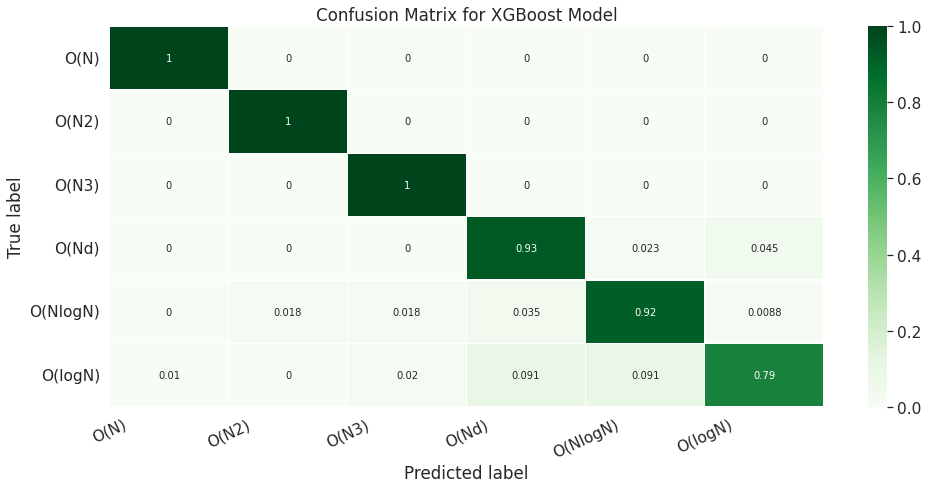

In [ ]:
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9874163743582093

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)
print(precision_score(y_test, ypred,average='weighted'))
print(recall_score(y_test, ypred,average='weighted'))
print(f1_score(y_test, ypred,average='weighted'))
print(cohen_kappa_score(y_test, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        84
           1       0.83      1.00      0.91        89
           2       0.92      1.00      0.96        90
           3       0.72      0.75      0.73        88
           4       0.76      0.61      0.68       113
           5       0.62      0.45      0.53        99

    accuracy                           0.79       563
   macro avg       0.78      0.80      0.78       563
weighted avg       0.77      0.79      0.77       563

Accuracy: 0.7868561278863233
0.7741966366616817
0.7868561278863233
0.7736088045856658
0.7445427974000537


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9550712402477498

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,multi_class="multinomial")
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
y_pred 

array([0, 2, 1, 4, 4, 5, 4, 0, 4, 5, 1, 3, 0, 0, 5, 1, 0, 3, 2, 2, 5, 4,
       4, 3, 5, 4, 2, 1, 4, 2, 0, 3, 3, 3, 1, 0, 5, 1, 5, 5, 5, 2, 0, 0,
       3, 5, 5, 3, 1, 4, 4, 3, 0, 4, 0, 0, 2, 1, 1, 5, 4, 4, 4, 0, 5, 1,
       2, 1, 2, 3, 1, 2, 3, 2, 4, 5, 4, 2, 5, 3, 0, 1, 1, 3, 3, 5, 1, 1,
       4, 3, 1, 3, 4, 3, 1, 5, 3, 0, 1, 5, 0, 2, 3, 0, 5, 0, 1, 2, 1, 1,
       4, 2, 3, 1, 0, 1, 0, 1, 0, 1, 5, 2, 4, 2, 5, 5, 4, 3, 1, 4, 1, 0,
       5, 1, 5, 1, 4, 3, 2, 3, 2, 2, 2, 4, 1, 5, 5, 3, 3, 0, 5, 4, 4, 3,
       0, 4, 1, 3, 4, 1, 0, 2, 1, 3, 0, 3, 0, 1, 3, 0, 2, 5, 0, 1, 4, 2,
       4, 5, 0, 5, 4, 1, 3, 2, 5, 0, 0, 0, 1, 3, 1, 0, 1, 3, 5, 5, 0, 0,
       5, 5, 1, 0, 3, 2, 0, 4, 2, 2, 1, 0, 0, 5, 2, 3, 0, 1, 5, 5, 1, 0,
       2, 3, 0, 3, 3, 1, 2, 1, 0, 0, 4, 5, 5, 0, 0, 0, 4, 2, 2, 4, 4, 0,
       2, 0, 0, 4, 0, 3, 2, 4, 5, 1, 4, 3, 0, 5, 3, 2, 1, 0, 1, 3, 0, 3,
       2, 3, 4, 0, 5, 2, 2, 0, 5, 0, 2, 5, 0, 3, 3, 2, 2, 4, 5, 3, 3, 5,
       2, 0, 5, 4, 0, 5, 2, 1, 5, 1, 4, 4, 3, 0, 2,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        84
           1       0.88      0.96      0.91        89
           2       0.93      0.97      0.95        90
           3       0.77      0.77      0.77        88
           4       0.83      0.67      0.74       113
           5       0.78      0.69      0.73        99

    accuracy                           0.83       563
   macro avg       0.83      0.84      0.83       563
weighted avg       0.83      0.83      0.83       563

Accuracy: 0.8312611012433393
0.8298662513212416
0.8312611012433393
0.8264509963911155
0.7976375599217564


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9550712402477498

# Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
y_pred = p.predict(X_test)
y_pred 

array([3, 2, 1, 3, 3, 0, 5, 2, 1, 5, 1, 5, 3, 0, 2, 1, 0, 3, 2, 3, 0, 3,
       2, 5, 3, 3, 2, 3, 1, 3, 1, 2, 5, 3, 3, 3, 5, 1, 0, 5, 1, 2, 3, 3,
       3, 1, 5, 0, 1, 3, 0, 1, 0, 4, 0, 3, 2, 1, 3, 5, 1, 1, 0, 3, 5, 1,
       2, 0, 5, 5, 3, 3, 1, 5, 2, 5, 1, 2, 2, 1, 1, 0, 3, 3, 3, 3, 0, 3,
       1, 3, 1, 5, 1, 0, 1, 0, 5, 3, 3, 1, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 2, 3, 1, 1, 1, 2, 1, 0, 3, 5, 3, 3, 2, 0, 1, 0, 3, 3, 1, 1, 0,
       3, 3, 2, 3, 1, 3, 2, 5, 2, 3, 5, 0, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1,
       3, 3, 0, 2, 3, 0, 3, 2, 3, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 4, 2,
       0, 0, 0, 5, 2, 1, 3, 3, 0, 0, 2, 1, 1, 3, 1, 0, 0, 3, 1, 2, 0, 2,
       1, 5, 1, 0, 1, 2, 1, 0, 2, 2, 1, 3, 0, 1, 5, 1, 3, 1, 0, 1, 1, 3,
       2, 1, 0, 3, 2, 3, 2, 1, 3, 3, 1, 0, 3, 3, 1, 1, 3, 2, 2, 1, 2, 3,
       3, 3, 3, 1, 3, 3, 2, 1, 5, 0, 1, 1, 2, 2, 3, 2, 1, 3, 1, 3, 1, 1,
       2, 5, 1, 0, 5, 2, 5, 3, 3, 3, 2, 0, 3, 3, 5, 5, 2, 1, 5, 3, 1, 3,
       2, 2, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 2, 1, 2,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.31      0.30        84
           1       0.32      0.53      0.40        89
           2       0.61      0.69      0.65        90
           3       0.24      0.47      0.31        88
           4       0.80      0.04      0.07       113
           5       0.39      0.18      0.25        99

    accuracy                           0.35       563
   macro avg       0.44      0.37      0.33       563
weighted avg       0.46      0.35      0.32       563

Accuracy: 0.35168738898756663
0.45750577820116095
0.35168738898756663
0.31723804526194005
0.22977597367306468


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9550712402477498